# CHAPTER 40: Independent Component Analysis

### This code generates figures 2, 3, 4, 5, 6, and 7 from Chapter 35: Independent Component Analysis (II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Example 40.1 (Mixing of independent source signals)

We illustrate the mixing operation in Fig. 40.2. A total of $N=2000$ samples for each of three independent sources, $\{s_n(1),s_n(2),s_n(3)\}$, are generated for $0\leq n\leq N-1$. The samples are normalized to have zero mean and a sample covariance matrix that is equal to the identity matrix, i.e.,  

$$
\frac{1}{N}\sum_{n=0}^{N-1} s_n=0,\;\;\;\;\;
\frac{1}{N-1}\sum_{n=0}^{N-1} s_n s_n^{\sf T} = I_3 \tag{40.8}
$$


The mixing matrix is selected randomly and is given by

$$
A=\begin{bmatrix}
0.4499&    0.5785 &   0.8613\\
0.0143  &  1.0344 &   0.6652\\
0.9680  &  0.7432  &  0.9624
\end{bmatrix} \tag{40.9}
$$

The mixed signal vectors $\{h_n\}$ are generated using (40.4) with individual entries denoted by $\{h_n(1),h_n(2),h_n(3)\}$.  For convenience of presentation, only the last $500$ samples from each sequence are shown in Fig. 40.2.

In [16]:
N = 2000
M = 3 # 3 sources

f = 60 # 60 Hz
T = 1/1000 # sampling rate

s1_file = scipy.io.loadmat("data/s1_file.mat")

s1 = 2*np.random.rand(N) - 1
s2 = np.sin(2*np.pi*f*np.arange(N)*T + np.pi*np.random.rand())
x1 = np.concatenate(
    [np.ones(int(N/10)), 0.5*np.ones(int(N/10)), 0.25*np.ones(int(N/10)), -0.5*np.ones(int(N/10)), -np.ones(int(N/10))], axis=0
)
x2 = np.concatenate(
    [np.ones(int(N/10)), 0.5*np.ones(int(N/10)), 0.25*np.ones(int(N/10)), -0.5*np.ones(int(N/10)), -np.ones(int(N/10))], axis=0
)
x3 = np.concatenate([x1, x2])
s3 = x3*(np.cos(2*np.pi*2*f*np.arange(N)*T))

#let us first normalize the sources so that theur covariance matrix is the indetity matrix
Sx = np.stack([s1, s2, s3])
bar_sx = Sx.mean(axis=1) # mean vector; Mx1
Scx = Sx - (bar_sx.reshape(-1, 1)@np.ones((1, N)))

Rs_hat = np.zeros((M, M))
for n in range(N):
    Rs_hat += Scx[:, n].reshape(-1, 1)@Scx[:, n].reshape(-1, 1).T
Rs_hat = Rs_hat / (N-1)

Ds, Us = np.linalg.eig(Rs_hat)
Ds = np.diag(np.sqrt(Ds))
S = np.linalg.inv(Ds)@(Us.T)@Scx # this is now the source matrix (zero mean and unit covariance matrix)

print("Covariance matrix of sources orthogonal")
print(S@S.T/(N-1))

s1n = S[0, :] # original sources with zero mean and unit variance; these are the sources we want to recorver
s2n = S[1, :]
s3n = S[2, :]

# Start data processing; Random mixing matrix
# Uncomment the line below to generate A randomly
# A = np.random.rand((M, M)) + 0.1*np.eye(M) # intertible matrix

A = np.array([
    [0.4499, 0.5785, 0.8613],
    [0.0143, 1.0344, 0.6652],
    [0.9680, 0.7432, 0.9624]
])
W = np.linalg.inv(A)
H = np.zeros((M, N))

H = A@S # mixing of sources

h1n = H[0, :] # mixed signals
h2n = H[1, :]
h3n = H[2, :]

a = 1500 #interval
b = 2000

Covariance matrix of sources orthogonal
[[1.00000000e+00 4.26538911e-17 5.19844298e-17]
 [4.26538911e-17 1.00000000e+00 2.98743854e-16]
 [5.19844298e-17 2.98743854e-16 1.00000000e+00]]


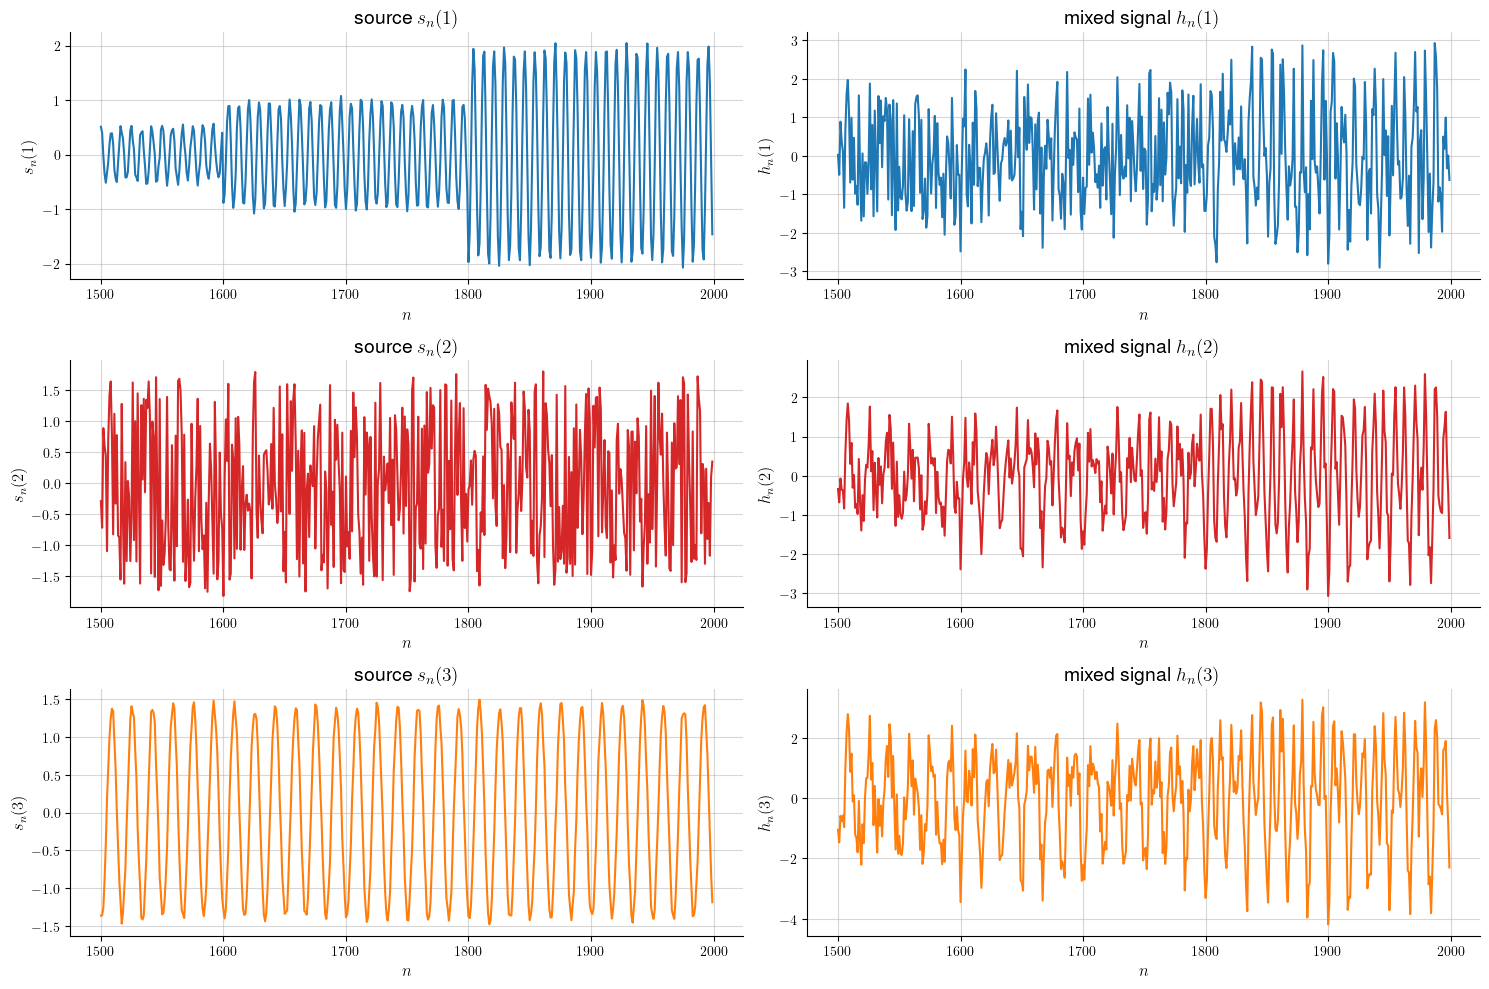

In [106]:
# figure 2 (mixed signals)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), h2n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(1)$", fontsize=12)
ax.set_title("mixed signal $h_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), h1n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(2)$", fontsize=12)
ax.set_title("mixed signal $h_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), h3n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(3)$", fontsize=12)
ax.set_title("mixed signal $h_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-2.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.2** The plots on the left show $500$ samples of the original sequences, $\{s_n(1),s_n(2),s_n(3)\}$. The plots on the right show the corresponding $500$ samples of the mixed signals $\{h_n(1),h_n(2),h_n(3)\}$. The objective of ICA implementations is to "unmix" the signals $\{h_n\}$ and "recover" the original sources $\{s_n\}$.

## Example 40. 5 (Enforcing orthogonal separating matrix)

We illustrate the operation of  algorithm (40.60) in Fig. 40.3. A total of $N=2000$ samples for each of three sources, $\{s_n(1),s_n(2),s_n(3)\}$, are generated. The samples are normalized to have zero mean and a sample covariance matrix that is equal to the identity matrix. The mixing matrix is selected randomly as

$$
A=\begin{bmatrix}
0.2173 &   0.9489 &   0.4658\\
0.7110 &   0.7758&    0.6627\\
0.5470 &   0.2769 &   0.7215
\end{bmatrix} \tag{40.61}
$$

The mixed measurements $\{h_n\}$ are pre-processed according to (40.36). Starting from the initial condition $W_{-1}'=I_3$ and using $\mu=0.5$, algorithm (40.60) is applied to observations $\{h_n'\}$ using the choice (40.49b) for $g_m(x)$. The result is shown
in Fig. 40.3. For convenience of presentation, only the last $500$ samples from each sequence are shown. The estimated sources are computed by applying expression (40.34)  using the limiting value that is obtained for the separating matrix $W_n'$ after $2000$ iterations.

In [5]:
# Data pre-processing

bar_h = H.mean(axis=1) # mean vector; Mx1
Hc = H - (bar_h.reshape(-1, 1)@np.ones((1, N))) # centering

Rh_hat = np.zeros((M, M))
for n in range(N):
    Rh_hat += Hc[:, n].reshape(-1, 1)@Hc[:, n].reshape(-1, 1).T
Rh_hat = Rh_hat / (N-1)

D, U = np.linalg.eig(Rh_hat)
D = np.diag(np.sqrt(D))
Hprime = np.linalg.inv(D)@U.T@Hc
Aprime = np.linalg.inv(D)@(U.T)@A

Rh_test = np.zeros((M, M)) # this calculation is just to check to see if we get the identity matrix
for n in range(N):
    Rh_test += Hprime[:, n].reshape(-1, 1)@Hprime[:, n].reshape(-1, 1).T

print("Rh_test should be identity matrix: ")
print(Rh_test/(n-1))

print("Aprime should be orthogonal or close-to-orthogonal")
print(Aprime@Aprime.T)

Rh_test should be identity matrix: 
[[ 1.00050050e+00 -4.35704192e-15 -1.77802384e-15]
 [-4.35704192e-15  1.00050050e+00 -3.90711821e-15]
 [-1.77802384e-15 -3.90711821e-15  1.00050050e+00]]
Aprime should be orthogonal or close-to-orthogonal
[[ 1.00000000e+00 -3.99346748e-15 -2.58743907e-16]
 [-3.99346748e-15  1.00000000e+00 -5.24051947e-15]
 [-2.58743907e-16 -5.24051947e-15  1.00000000e+00]]


In [6]:
# Maximun-likelihood-based ICA

mu = 0.5 # step-size
Wprime2 = np.eye(M)
for n in range(N):
    h = Hprime[:, n]
    g = np.zeros(M)
    for m in range(M):
        a = Wprime2[m, :] @ h 
        b = np.exp(-a)
        g[m] = (1-b) / (1+b)
        Wprime2[m, :] -= mu*g[m]*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (Wprime2[m, :]).T
        for ell in range(m):
            x -= (Wprime2[m, :]@Wprime2[ell, :].T)*(Wprime2[ell, :].T)
        x = x/np.linalg.norm(x)
        Wprime2[m, :] = x.T

print("Wprime2 multiplied by its transpose should be close to identity")
print(Wprime2@Wprime2.T)

print("Wprime2 multiplied by Aprime should be close to identity")
print(Aprime@Wprime2)

Sp_hat2 = Wprime2@Hprime # estimates of s' signals
s1p_hat2 = Sp_hat2[0, :]
s2p_hat2 = Sp_hat2[1, :]
s3p_hat2 = Sp_hat2[2, :]

a = 1500 #interval
b = 2000

Wprime2 multiplied by its transpose should be close to identity
[[ 1.00000000e+00 -1.20034737e-16  1.45981019e-16]
 [-1.20034737e-16  1.00000000e+00  1.57287084e-16]
 [ 1.45981019e-16  1.57287084e-16  1.00000000e+00]]
Wprime2 multiplied by Aprime should be close to identity
[[ 0.05683644  0.8046813  -0.59098022]
 [-0.74915923 -0.35690561 -0.55801329]
 [ 0.65994701 -0.47445378 -0.58254918]]


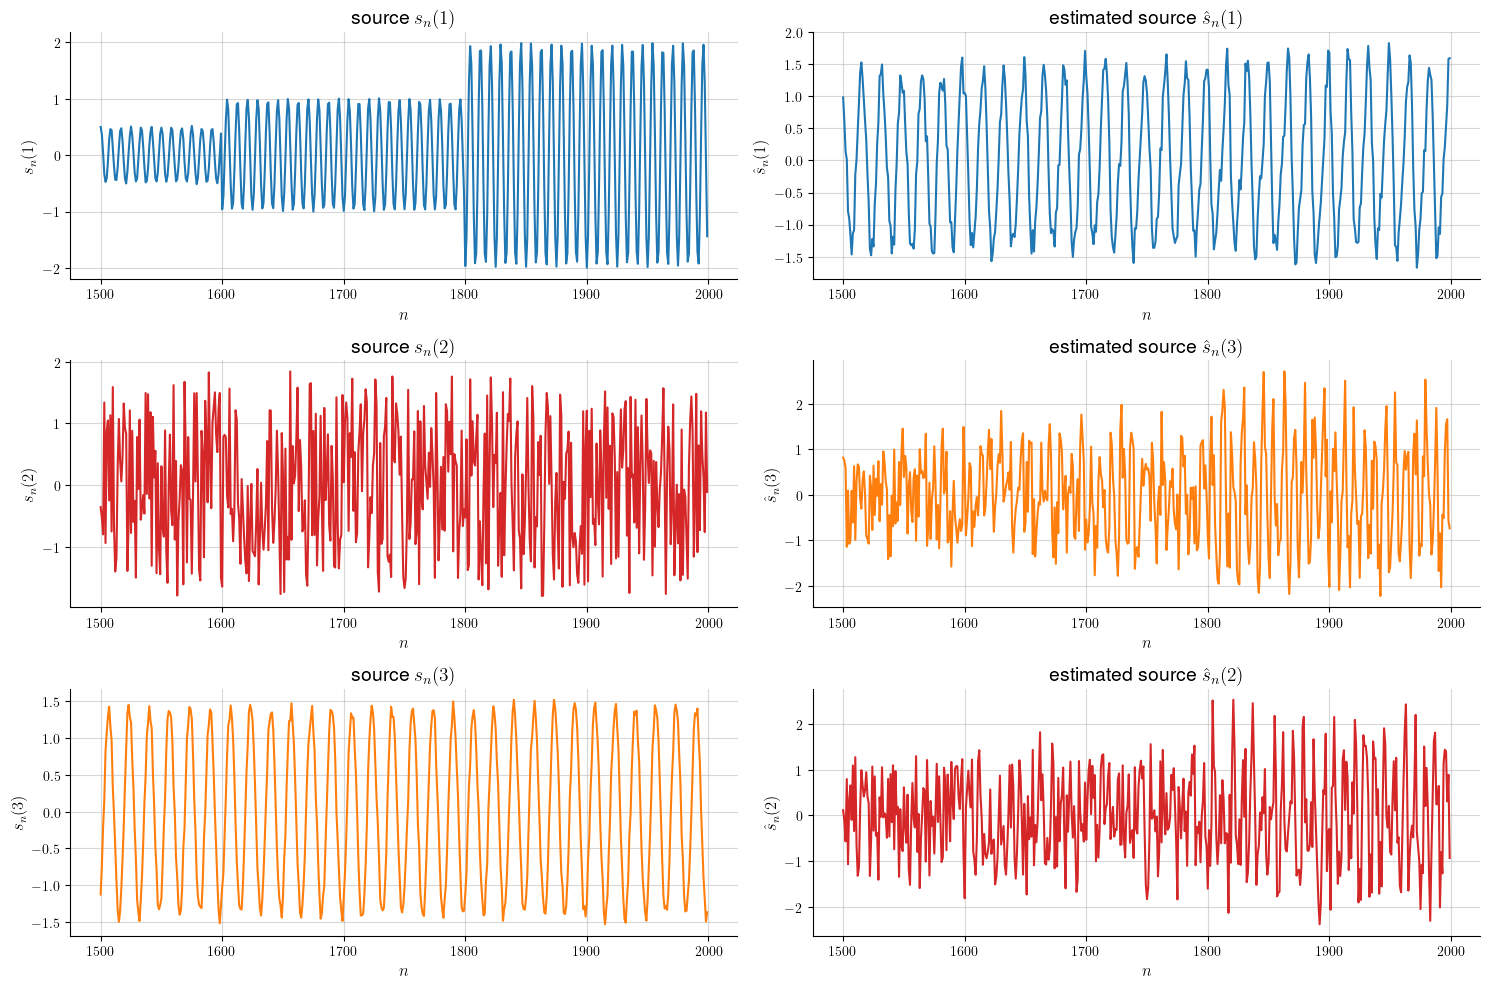

In [7]:
# figure 3 (maximum likelihood)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s3p_hat2[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s1p_hat2[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s2p_hat2[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-3.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.3** The plots on the left show $500$ samples of the original sequences, $\{s_n(1),s_n(2),s_n(3)\}$. The plots on the right show the recovered $500$ samples using algorithm (40.60). Observe that the orders of the second and third signals are reversed. 

## Example 40.6 (Using ICA mutual information formulation)

We illustrate the operation of  algorithm (40.71) in Fig. 40.4. A total of $N=2000$ samples for each of three sources, $\{s_n(1),s_n(2),s_n(2)\}$, are generated. The samples are normalized to have zero mean and a sample covariance matrix that is equal to  the identity matrix. The mixing matrix was selected randomly to be

$$
A=\begin{bmatrix}
0.4837 &   0.3253  &  0.8208\\
0.7576 &   0.2082 &   0.4537\\
0.7446 &   0.4348 &   0.9186
\end{bmatrix} \tag{40.72}
$$

Starting from a random initial choice for $W_{-1}$ and using $\mu=0.02$, recursion (40.71) is applied to the
observations $\{h_n\}$ using the choice (40.49b) for $g_m(x)$. The result in shown
Fig. 40.4. For convenience of presentation, only the last $500$ samples from each sequence are shown. The estimated sources are computed by applying expression (40.7) to the observation vectors $\{h_n\}$ using the limiting value that is obtained for the separating matrix $W_n$ after $2000$ iterations.

In [8]:
# Mutual Information; w is not orthogonal
W_hat = np.random.rand(M, M)
mu = 0.02 # step-size

for n in range(N):
    h = H[:, n]
    g = np.zeros(M)
    for m in range(M):
        row = W_hat[m, :]
        a = row@h 
        b = np.exp(-a)
        g[m] = (1-b)/(1+b)
    XX = (np.linalg.inv(W_hat)).T
    W_hat += mu*(XX-g.reshape(-1, 1)@H[:, n].reshape(-1, 1).T)

print("W-hat multiplied by A should be close to identity")
print(A@W_hat)

Sp_hat3 = W_hat@H # estimates of the S' signals
s1p_hat3 = Sp_hat3[0, :]
s2p_hat3 = Sp_hat3[1, :]
s3p_hat3 = Sp_hat3[2, :]

a = 1500 # interval
b = 2000

W-hat multiplied by A should be close to identity
[[ 0.34331277  0.91205312  0.17386256]
 [ 3.49749362  0.63127856 -2.32692765]
 [-1.92056092  2.14220372  1.41554387]]


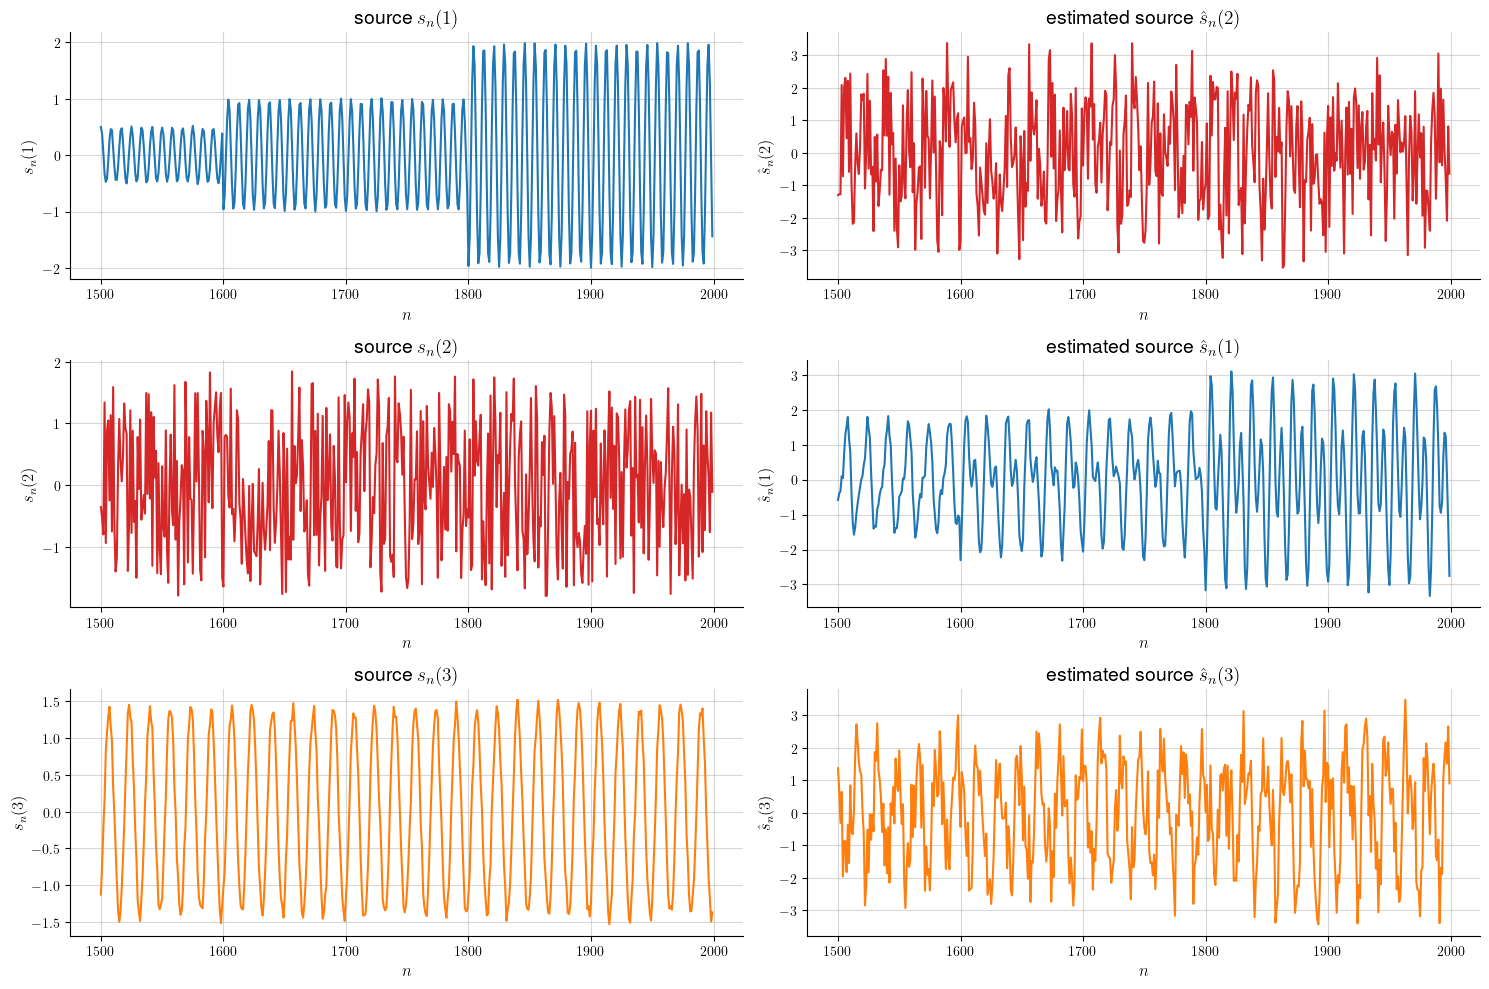

In [9]:
# figure 4 (mutual information)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s3p_hat3[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s1p_hat3[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s2p_hat3[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.4** The plots on the left show $500$ samples of the original sequences, $\{s_n(1),s_n(2),s_n(3)\}$. The plots on the right show the recovered $500$ samples using algorithm (40.71). Observe that the orders of the first and second signals are reversed. 

## Example 40.9 (Simultaneous updates)

We illustrate the operation of  algorithm
(40.111) in Fig. 40.5. A total of $N=2000$ samples for each of three sources, $\{s_n(1),s_n(2),s_n(3)\}$, are generated. The samples are normalized to have zero mean and a sample covariance matrix that is equal to the identity matrix. The mixing matrix is selected randomly as

$$
A=\begin{bmatrix}
0.1386  &  0.4888  &  0.7374\\
0.2667  &  0.2471 &   0.7359\\
0.4677  &  0.5799  &  0.6397
\end{bmatrix} \tag{40.112}
$$

The mixed measurements $\{h_n\}$ are pre-processed  according to (40.36). Starting from the initial condition $W_{-1}'=I_3$ and using $\mu=0.5$, algorithm (40.111) is applied to the
observations $\{h_n'\}$ using choice (40.49b) for $g_m(x)$ as well as
$B(y)=4y^3$ and $B'(y)=12y^2$. The result in shown
Fig. 40.5. For convenience of presentation, only the last $500$ samples from each sequence are shown. The estimated sources are computed by applying expression (40.34) to the  vectors $\{h_n'\}$ using the limiting value that was obtained for the separating matrix $W_n'$ after $2000$ iterations.

In [18]:
# Kurtosis formulation
W_prime3 = np.eye(M)
mu = 0.5 # step-size

for n in range(N):
    h = H[:, n]
    b_value = 0
    b_prime_value = 0

    for m in range(M):
        a = W_prime3[m, :]@h 
        b_value = 4*(a**3)
        b_prime_value = 12*(a**2)
        W_prime3[m, :] = b_prime_value*W_prime3[m, :]-b_value*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (W_prime3[m, :]).T
        for ell in range(m):
            x -= (W_prime3[m, :]@W_prime3[ell, :].T)*(W_prime3[ell, :].T)
        x = x/np.linalg.norm(x)
        W_prime3[m, :] = x.T

print("W_prime3 multiplied by its transpose should be close to identity")
print(W_prime3@W_prime3.T)

print("W_prime3 multiplied by Aprime should be close to identity")
print(Aprime@W_prime3)

Sp_hat4 = W_prime3@Hprime # estimates of the S' signals
s1p_hat4 = Sp_hat4[0, :]
s2p_hat4 = Sp_hat4[1, :]
s3p_hat4 = Sp_hat4[2, :]

a = 1500 # interval
b = 2000

W_prime3 multiplied by its transpose should be close to identity
[[ 1.00000000e+00 -9.82908961e-17  6.03737333e-18]
 [-9.82908961e-17  1.00000000e+00  1.25085918e-18]
 [ 6.03737333e-18  1.25085918e-18  1.00000000e+00]]
W_prime3 multiplied by Aprime should be close to identity
[[ 0.67225569  0.73165591 -0.11292442]
 [-0.72935558  0.62839622 -0.27047851]
 [-0.12693592  0.26419277  0.95608025]]


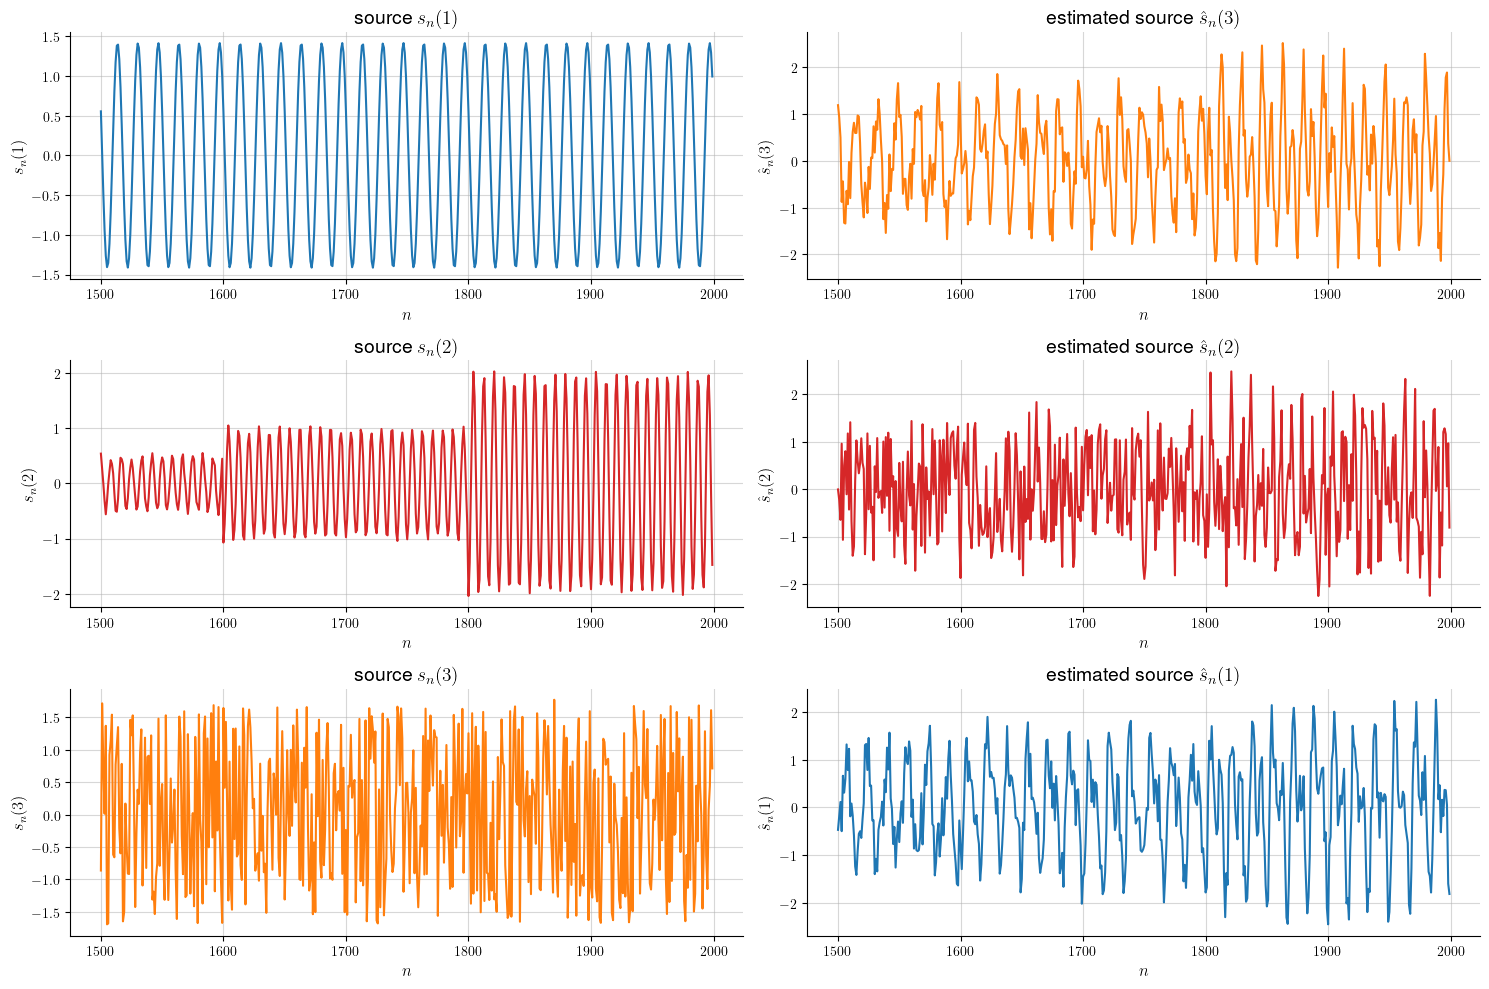

In [19]:
# figure 5 (kurtosis)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s1p_hat4[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s2p_hat4[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s3p_hat4[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-5.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.5** The plots on the left show $500$ samples of the original sequences, $\{s_n(1),s_n(2),s_n(3)\}$. The plots on the right show the recovered $500$ samples using algorithm (40.111). Observe that the orders of the first and third signals are reversed.

## Example 40.10 (Identifying subspaces with non-Gaussian distributions)

We examine the operation of algorithm (40.121) by generating $N=200$ random observation vectors $h_n\in\mathbb{R}^{3}$. For illustration purposes, we generate observations that belong to one of two classes, $+1$ or $-1$. Each color in the plots represents one class. The top plot in Fig. 40.6 shows a 3D scatter diagram of the data. The bottom plot shows the resulting projected vectors, $s_{n}'\in\mathbb{R}^{2}$, obtained from (40.116) after running recursion
(40.121) to estimate the row vectors $\{(w_{1}')^{\sf T},\,(w_{2}')^{\sf T}\}$. Figure 40.7 shows a 3D scatter diagram of the preprocessed vectors, $h_{n}'\in\mathbb{R}^3$ on the left, while the plot on the right shows the same data along with the hyperplane corresponding to the column span of the $3\times 2$ matrix $(W_1')^{\sf T}$.

In [205]:
# Projection pursuit
M = 3
N = 200
lambda1 = np.array([np.random.rand(), 10*(np.random.rand()+0.5), 20*(np.random.rand()+0.5)])
lambda1 = np.array([1, 1, 1])

H1 = np.sqrt(np.diag(lambda1))@(np.random.rand(M, int(N/2)) + 0.5*np.random.rand(M, 1)@np.ones((1, int(N/2)))) # feature vectors for class +1
g1 = np.ones((int(N/2)))

H2 = np.sqrt(np.diag(lambda1))@(np.random.rand(M, int(N/2)) - 0.5*np.random.rand(M, 1)@np.ones((1, int(N/2)))) # feature vectors for class -1
g2 = -np.ones((int(N/2)))

Hx = np.concatenate([H1, H2], axis=-1)
gx = np.concatenate([g1, g2])
H = np.zeros((M, N))
g = np.zeros(N)

P = np.random.permutation(N)
for n in range(N):
    H[:, n] = Hx[:, P[n]] # columns are feature vectors
    g[n] = gx[P[n]] # classes

# Data pre-processing

bar_h = H.mean(axis=1) # mean vector; Mx1
Hc = H - (bar_h.reshape(-1, 1)@np.ones((1, N))) # centering

Rh_hat = np.zeros((M, M))
for n in range(N):
    Rh_hat += Hc[:, n].reshape(-1, 1)@Hc[:, n].reshape(-1, 1).T
Rh_hat = Rh_hat / (N-1)

D, U = np.linalg.eig(Rh_hat)
D = np.diag(np.sqrt(D))
Hp = np.linalg.inv(D)@U.T@Hc

# projection pursuit using Kurtosis measure

Wp = np.eye(M)
mu = 0.5 # step-size

for n in range(N):
    h = H[:, n]
    b_value = 0
    b_prime_value = 0

    for m in range(M):
        a = Wp[m, :]@h 
        b_value = 4*(a**3)
        b_prime_value = 12*(a**2)
        Wp[m, :] = b_prime_value*Wp[m, :]-b_value*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (Wp[m, :]).T
        for ell in range(m):
            x -= (Wp[m, :]@Wp[ell, :].T)*(Wp[ell, :].T)
        x = x/np.linalg.norm(x)
        Wp[m, :] = x.T

Wprime = Wp[:M-1, :]

Sp = Wprime@Hp # projection
s1p = Sp[0, :]
s2p = Sp[1, :]

xg = np.ones(N)
yg = np.ones(N)
xr = np.ones(N)
yr = np.ones(N)

for n in range(N): # for plotting data
    if g[n] == +1:
        xg[n] = Sp[0, n] # x-coordinate
        yg[n] = Sp[1, n] # y-coordinate
    else:
        xr[n] = Sp[0, n] # x-coordinate
        yr[n] = Sp[1, n] # y-coordinate

xg3 = np.ones(N)
yg3 = np.ones(N)
zg3 = np.ones(N)
xr3 = np.ones(N)
yr3 = np.ones(N)
zr3 = np.ones(N)

for n in range(N): # for 3-D plot of original data
    if g[n] == +1:
        xg3[n] = H[0, n] # x-coordinate
        yg3[n] = H[1, n] # y-coordinate
        zg3[n] = H[2, n] # z-coordinate
    else:
        xr3[n] = H[0, n] # x-coordinate
        yr3[n] = H[1, n] # y-coordinate
        zr3[n] = H[2, n] # z-coordinate

xg3p = np.ones(N)
yg3p = np.ones(N)
zg3p = np.ones(N)
xr3p = np.ones(N)
yr3p = np.ones(N)
zr3p = np.ones(N)

for n in range(N): # for 3-D plot of centered and normalized data
    if g[n] == +1:
        xg3p[n] = Hp[0, n] # x-coordinate
        yg3p[n] = Hp[1, n] # y-coordinate
        zg3p[n] = Hp[2, n] # z-coordinate
    else:
        xr3p[n] = Hp[0, n] # x-coordinate
        yr3p[n] = Hp[1, n] # y-coordinate
        zr3p[n] = Hp[2, n] # z-coordinate

U1 = Wprime.T

aa = np.arange(-2.5, 2.5, 0.1)
bb = np.arange(-2.5, 2.5, 0.1)

xp = np.ones(int(len(aa)*len(bb)))
yp = np.ones(int(len(aa)*len(bb)))
zp = np.ones(int(len(aa)*len(bb)))

k = 0
for a in aa: # plane on which projection is occuring, range of the two columns of U1
    for b in bb:
        r = U1@np.array([[a], [b]])
        xp[k] = r[0][0]
        yp[k] = r[1][0]
        zp[k] = r[2][0]
        k+=1

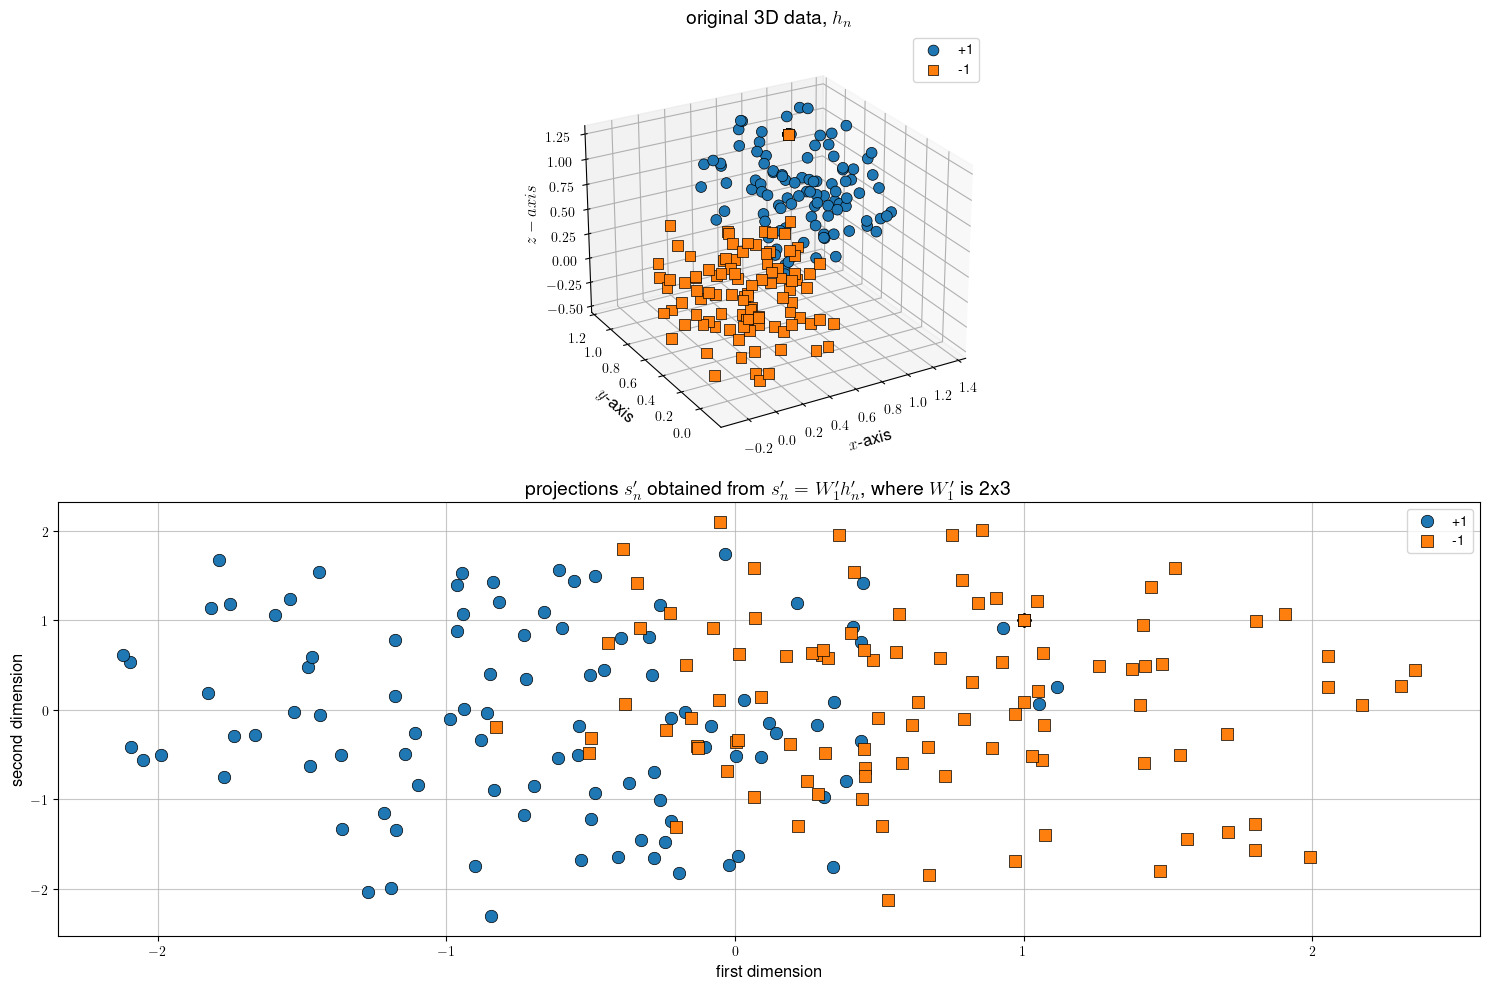

In [206]:
# figure 6 (scatter diagrams)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')

ax.scatter(xg3, yg3, zg3, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr3, yr3, zr3, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("original 3D data, ${h_n}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

ax = fig.add_subplot(212)

ax.scatter(xg, yg, s=80, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr, yr, s=80, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.set_xlabel("first dimension", fontsize=12)
ax.set_ylabel("second dimension", fontsize=12)
ax.set_title("projections ${s_n'}$ obtained from $s_n'=W_1'h_n'$, where $W_1'$ is 2x3", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

fig.tight_layout()

plt.savefig("figs/fig-6.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.6** The top plot shows a 3-D scatter diagram of the original $N=200$ observation vectors, $\{h_n\in\mathbb{R}^{3}\}$. The bottom plot shows the vectors $\{s_{n}'\in\mathbb{R}^{2}\}$ that result from (40.116).

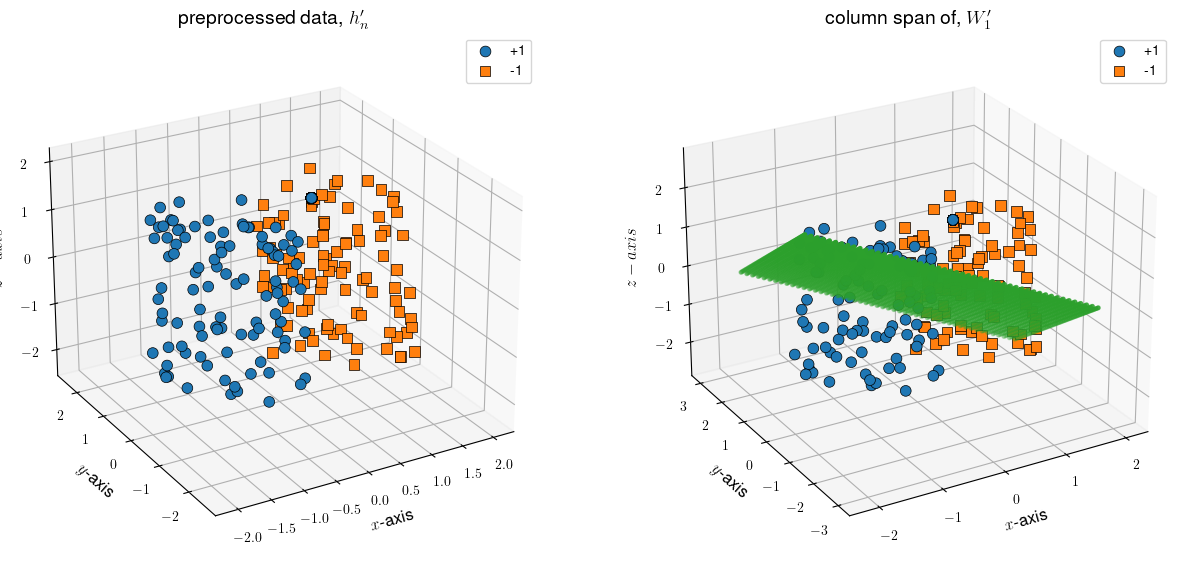

In [216]:
# figure 7 (3D scatter diagrams)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(121, projection='3d')

ax.scatter(xg3p, yg3p, zg3p, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr3p, yr3p, zr3p, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("preprocessed data, ${h_n'}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

ax = fig.add_subplot(122, projection='3d')

ax.scatter(xg3p, yg3p, zg3p, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr3p, yr3p, zr3p, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.scatter(xp, yp, zp, zorder=1, s=7)
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("column span of, ${W_1'}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

plt.savefig("figs/fig-fig-7.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 40.7** The plot on the left shows a 3D scatter diagram of the pre-processed (centralized and normalized)  vectors, $\{h_{n}'\}$. The plot on the right shows the same scatter diagram along with the hyperplane representing the column span of the $3\times 2$ matrix $(W_1')^{\sf T}$.